# Introduction to Programming Artificial Intelligence 

## Class 9 - K-Means

### Exercise 1

Load the dataset ClusterDs1.csv from the Moodle page into a DataFrame and make a scatter plot using the plt.scatter() function.

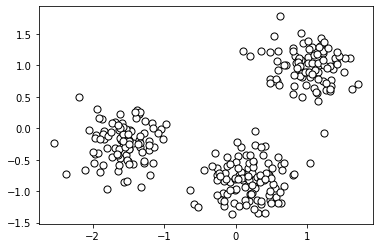

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv ("ClusterDs1.csv")
X = df.values

# plot
plt.scatter(
    X[:, 0], X[:, 1],
    c='white', marker='o',
    edgecolor='black', s=50
)
plt.show()

### Exercise 2
From the scatter plot of the previous exercise, you got a good idea of how many cluster the data represents. Now create a K-Means model to find the clusters, and fit it to the data points from the previous exercise.

In [2]:
from sklearn.cluster import KMeans # required import

# plot the centroids
km = KMeans(
    n_clusters=3, # number of clusters
    init='random', # centroid initialisation
    n_init=10, # number of executions
    max_iter=300, # number of iterations
    random_state=0 # random seed
)

### Exercise 3 
Using the model trained in the previous step, use the predict() method to get a list of cluster labels. Assign the result to a variable named labels.

In [3]:
labels = km.fit_predict(X)

### Exercise 4
Using the labels from the previous exercise, update the plot to show points in different colour depending on what cluster they belong.

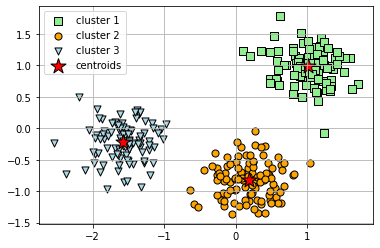

In [4]:
X=df.values
# cluster 1
plt.scatter(
    X[labels == 0, 0], X[labels == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)
# cluster 2
plt.scatter(
    X[labels == 1, 0], X[labels == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)
# cluster 3
plt.scatter(
    X[labels == 2, 0], X[labels == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)
# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

### Exercise 5
Load the dataset ClusterDs2.csv from the Moodle page into a separate DataFrame. Using the model trained from the previous step, use the predict() method to get a list of cluster labels for the data. Assign the result to a variable named predicted_labels

In [5]:
df2 = pd.read_csv ("ClusterDs2.csv")
Y = df2.values
predicted_labels = km.fit_predict(Y)

### Exercise 6
For each data point in the DataFrame of the previous step, calculate the Euclidean distance to each of the centroids of the cluster model. You can obtain the coordinates of the centroids using the .cluster_centers_ attribute of K-Means model. The Euclidean distance is given by:

$$d(p,c)= \sqrt{\sum_{i=1}^{n}(p_i-c_i)^2}$$

where $p_i$ is the value of the $i$-th dimension for the point $p$, $c_i$ is the value of the $i$-th dimension for the centroid $c$, and $n$ is the number of dimensions.

In [6]:
import numpy as np
def k_mean_distance(data, cx, cy, i_centroid, cluster_labels):
        distances = [np.sqrt((x-cx)**2+(y-cy)**2) for (x, y) in data[cluster_labels == i_centroid]]
        return distances
    
centroids = km.cluster_centers_

distances = []
for i, (cx, cy) in enumerate(centroids):
    mean_distance = k_mean_distance(Y, cx, cy, i, predicted_labels)
    distances.append(mean_distance)

print(distances)

[[0.4033305520160074, 0.4783936964313881, 0.5863633905326809, 0.32077733711353856], [0.1455219296009901, 0.45814182822611516, 0.8350824531612435, 0.19102624984260982, 0.15084688480045888, 0.2682513055968726], [0.5898620619461921, 0.402605242553609, 0.361721370549609, 0.5240794917791898, 0.25710320066258463, 0.37413971648933153, 0.46924869754792103, 0.269966400700177, 0.14358734053692743]]


### Exercise 7
Using the distance values calculated in the previous step, add a new column to the DataFrame from Step 5 to store the a value representing the index of the centroid that the point is closer to – e.g., 0 if the data point is closer to centroid 0, 1 if the data point is closer to centroid 1, and so forth.

In [7]:
rounded = [int(round(x, 0)) for x in sum(distances, [])]
df2['Centroid'] = rounded
df2

,0.896764687336586,1.1431267871385924,Centroid
0,0.973851,0.929172,0
1,-1.839089,0.348506,0
2,-1.045098,0.072468,1
3,0.820274,-0.710225,0
4,0.633960,-1.164268,0
5,1.277559,1.379494,0
6,0.157210,-0.623195,1
7,-0.234000,-1.023043,0
8,-1.955400,-0.297588,0
9,0.029362,-0.955299,0


### Exercise 8
Compare the predicted cluster labels (Step 5) with the cluster labels calculated in Step 7 – they should be the same.

In [8]:
print(predicted_labels)

[1 0 0 2 2 1 2 2 0 2 2 0 2 1 1 2 1 1 2]


In [9]:
print(df2["Centroid"].to_numpy())

[0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0]
